<a href="https://colab.research.google.com/github/janeeeeverdad/Verdad/blob/main/3B_VERDAD_EXER6(AT6).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSST 104
**Verdad, Jane Benneth Dione**

**BSCS-3B**

**March 28, 2024**

**Due Date: March 27, 2024**


**Part 1: Data Loading and Preprocessing**

1.1 Import Libraries and Load the Dataset:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

data = pd.read_csv('onlinefoods.csv')

1.2 Handle Missing Values:

In [ ]:
#print(data.isnull().sum())
#Remove rows with missing values
data.dropna(inplace=True)

1.3 Encode Categorical Variables:

In [ ]:
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Marital Status'] = label_encoder.fit_transform(data['Marital Status'])
data['Occupation'] = label_encoder.fit_transform(data['Occupation'])
data['Monthly Income'] = label_encoder.fit_transform(data['Monthly Income'])
data['Output'] = label_encoder.fit_transform(data['Output'])

1.4 Feature Selection:

In [ ]:
data_features = ['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Output']
data_target = 'Feedback'

data_subset = data[data_features + [data_target]]
print(data_subset.head())


   Age  Gender  Marital Status  Occupation  Monthly Income  Output   Feedback
0   20       0               2           3               4       1   Positive
1   24       0               2           3               2       1   Positive
2   22       1               2           3               2       1  Negative 
3   22       0               2           3               4       1   Positive
4   22       1               2           3               2       1   Positive


**Part 2: Exploratory Data Analysis (EDA)**

Descriptive Statistics and Visulaization:

              Age      Gender  Marital Status  Occupation  Monthly Income  \
count  388.000000  388.000000      388.000000  388.000000      388.000000   
mean    24.628866    0.572165        1.412371    1.902062        2.713918   
std      2.975593    0.495404        0.895035    1.329722        1.491790   
min     18.000000    0.000000        0.000000    0.000000        0.000000   
25%     23.000000    0.000000        0.000000    0.000000        1.000000   
50%     24.000000    1.000000        2.000000    3.000000        3.000000   
75%     26.000000    1.000000        2.000000    3.000000        4.000000   
max     33.000000    1.000000        2.000000    3.000000        4.000000   

           Output  
count  388.000000  
mean     0.775773  
std      0.417611  
min      0.000000  
25%      1.000000  
50%      1.000000  
75%      1.000000  
max      1.000000  


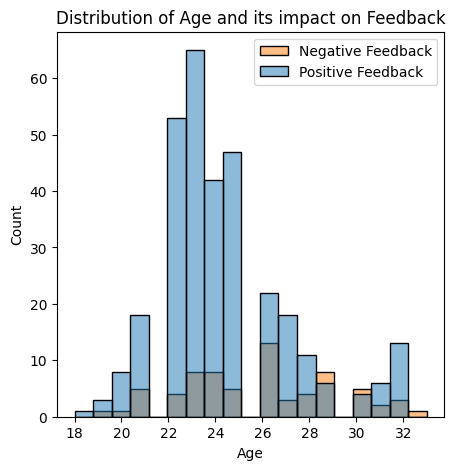

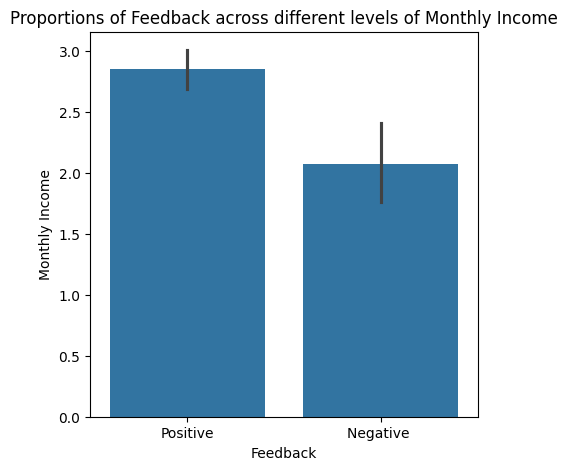

<ipython-input-7-d3fcefbeed86>:24: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_subset.corr(), annot=True, cmap='coolwarm', fmt='.2f')


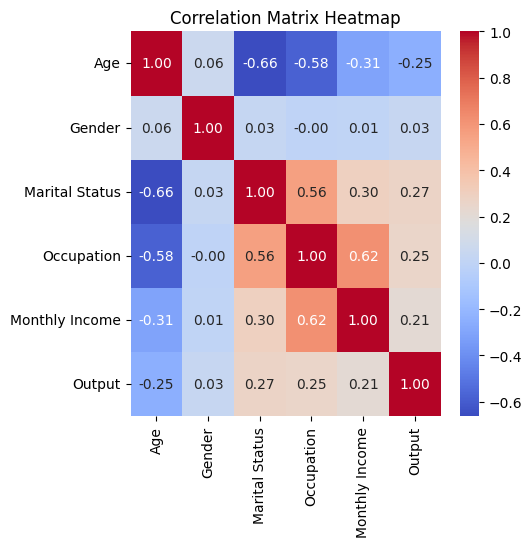

In [ ]:
#2.1 Descriptive Statistics:
print(data_subset.describe())

#2.2 Visualizations:
#Distribution of Age and its impact on Feedback.
plt.figure(figsize=(5, 5))
sns.histplot(x='Age', data=data_subset, hue='Feedback', kde=False)
plt.title('Distribution of Age and its impact on Feedback')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(['Negative Feedback', 'Positive Feedback'])
plt.show()

#Proportions of Feedback across different levels of Monthly Income.
plt.figure(figsize=(5, 5))
sns.barplot(x='Feedback', y='Monthly Income', data=data_subset)
plt.title('Proportions of Feedback across different levels of Monthly Income')
plt.xlabel('Feedback')
plt.ylabel('Monthly Income')
plt.show()

#Correlation matrix heatmap to identify any interesting correlations between features.
plt.figure(figsize=(5, 5))
sns.heatmap(data_subset.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


**Part 3: Logistic Regression Model**

3.1 Build the Model:

In [ ]:
X = data_subset[data_features]
Y = data_subset['Feedback']

#Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#Fit the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, Y_train)

#Predict on the test set
Y_predict = model.predict(X_test)


3.2 Model Evaluation:

In [ ]:
accuracy = accuracy_score(Y_test, Y_predict)
precision = precision_score(Y_test, Y_predict, pos_label='Positive')
recall = recall_score(Y_test, Y_predict, pos_label='Positive')
conf_matrix = confusion_matrix(Y_test, Y_predict)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8589743589743589
Precision: 0.9117647058823529
Recall: 0.9253731343283582
Confusion Matrix:
[[ 5  6]
 [ 5 62]]


**Part 4: Data Analysis and Visualization**

4.1 Feature Importance:

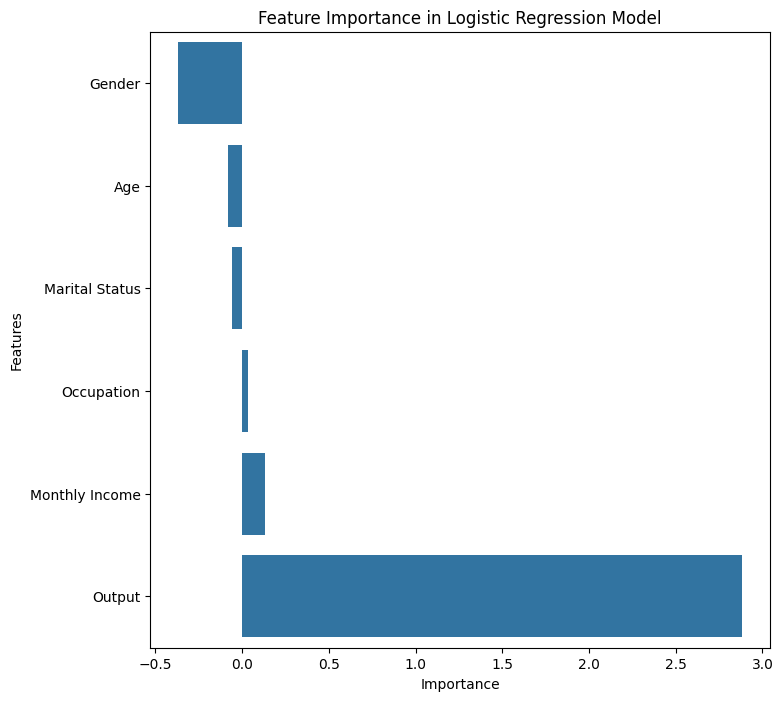

          Feature  Coefficient
1          Gender    -0.367530
0             Age    -0.079674
2  Marital Status    -0.060205
3      Occupation     0.033147
4  Monthly Income     0.130138
5          Output     2.881861


In [ ]:
#Feature Importance:
feature_importance = model.coef_[0]
feature_importance_data = pd.DataFrame({'Feature': data_features, 'Coefficient': feature_importance})
feature_importance_data = feature_importance_data.sort_values(by='Coefficient', ascending=True)

#Visualize feature importance
plt.figure(figsize=(8, 8))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance_data)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Logistic Regression Model')
plt.show()

print(feature_importance_data)

4.2 Prediction Insights:

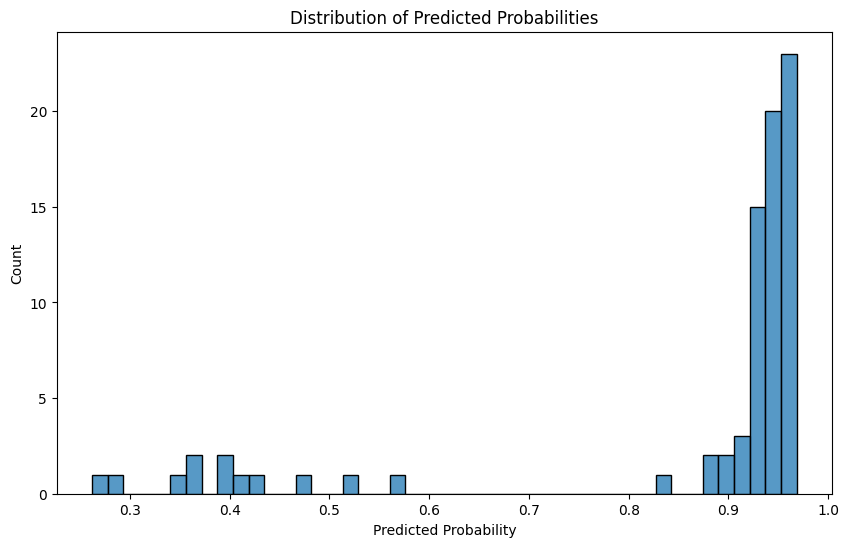

In [ ]:
Y_probabilty = model.predict_proba(X_test)[:, 1]

#Distribution of predicted probabilities
plt.figure(figsize=(10, 6))
sns.histplot(Y_probabilty, kde=False)
plt.xlabel('Predicted Probability')
plt.ylabel('Count')
plt.title('Distribution of Predicted Probabilities')
plt.show()